In [1]:
# Import libraries. You may or may not use all of these.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

2025-04-15 22:00:00.772675: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-15 22:00:00.914557: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744747200.989643    6258 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744747201.009783    6258 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744747201.132063    6258 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
#Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2025-04-15 22:00:12--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.4’

insurance.csv.4     100%[===================>]  49,09K  --.-KB/s    in 0,002s  

2025-04-15 22:00:12 (25,3 MB/s) - ‘insurance.csv.4’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Normalize numeric features
from sklearn.preprocessing import StandardScaler

# Convert categorical data to numbers 
CATEGORICAL_COLUMNS = ['sex', 'smoker', 'region']
NUMERIC_COLUMNS = ['age', 'bmi', 'children', 'expenses']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dataset[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

# Calculate the split index for 80% training and 20% testing
split_index = int(len(dataset) * 0.8)

# Split the dataset into training and testing sets
train_dataset = dataset[:split_index]
test_dataset = dataset[split_index:]

# pop off the "expenses" column from these datasets
train_labels = train_dataset['expenses']
test_labels = test_dataset['expenses']

scaler = StandardScaler()
train_dataset[NUMERIC_COLUMNS] = scaler.fit_transform(train_dataset[NUMERIC_COLUMNS])
test_dataset[NUMERIC_COLUMNS] = scaler.transform(test_dataset[NUMERIC_COLUMNS])

# Convert categorical features to one-hot encoding
train_dataset = pd.get_dummies(train_dataset, columns=CATEGORICAL_COLUMNS)
test_dataset = pd.get_dummies(test_dataset, columns=CATEGORICAL_COLUMNS)

# Ensure both datasets have the same columns
test_dataset = test_dataset.reindex(columns=train_dataset.columns, fill_value=0)

# Build the Keras model
model = Sequential([
    Dense(64, activation='relu', input_shape=(train_dataset.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

# Train the model
history = model.fit(
    train_dataset, train_labels,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)


Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('female', 'male'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='smoker', vocabulary_list=('yes', 'no'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='region', vocabulary_list=('southwest', 'southeast', 'northwest', 'northeast'), dtype=tf.string, default_value=-1, num_oov_buckets=0), NumericColumn(key='age', sha

/tmp/ipykernel_6258/3776286368.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dataset[NUMERIC_COLUMNS] = scaler.fit_transform(train_dataset[NUMERIC_COLUMNS])
/tmp/ipykernel_6258/3776286368.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataset[NUMERIC_COLUMNS] = scaler.transform(test_dataset[NUMERIC_COLUMNS])
/home/lorenzo/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequenti

Epoch 1/100


I0000 00:00:1744747225.522918    7186 service.cc:152] XLA service 0x7b4bfc005310 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744747225.522958    7186 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-04-15 22:00:25.571366: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1744747225.848591    7186 cuda_dnn.cc:529] Loaded cuDNN version 90300


23/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 323118816.0000 - mae: 13245.8398 - mse: 323118816.0000

I0000 00:00:1744747228.635835    7186 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 205ms/step - loss: 322698368.0000 - mae: 13239.0137 - mse: 322698368.0000 - val_loss: 314122784.0000 - val_mae: 13262.4404 - val_mse: 314122784.0000
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 318863264.0000 - mae: 13088.5156 - mse: 318863264.0000 - val_loss: 313978976.0000 - val_mae: 13257.5830 - val_mse: 313978976.0000
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 310549696.0000 - mae: 12772.6914 - mse: 310549696.0000 - val_loss: 313647040.0000 - val_mae: 13246.7637 - val_mse: 313647040.0000
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 331618176.0000 - mae: 13295.8613 - mse: 331618176.0000 - val_loss: 312965664.0000 - val_mae: 13225.3389 - val_mse: 312965664.0000
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 297788416.0000 - mae: 12864.7939 - mse: 297788416.0000 - val_loss: 311723968.0000 - val_mae: 13187.3438 - val_mse: 311723968.0000
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 

9/9 - 1s - 149ms/step - loss: 2448150.0000 - mae: 992.0452 - mse: 2448150.0000
Testing set Mean Abs Error: 992.05 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


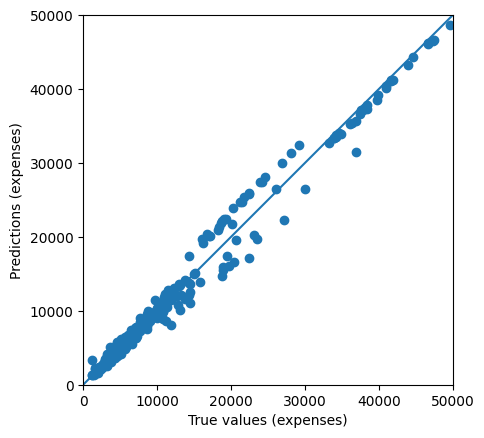

In [4]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)